In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

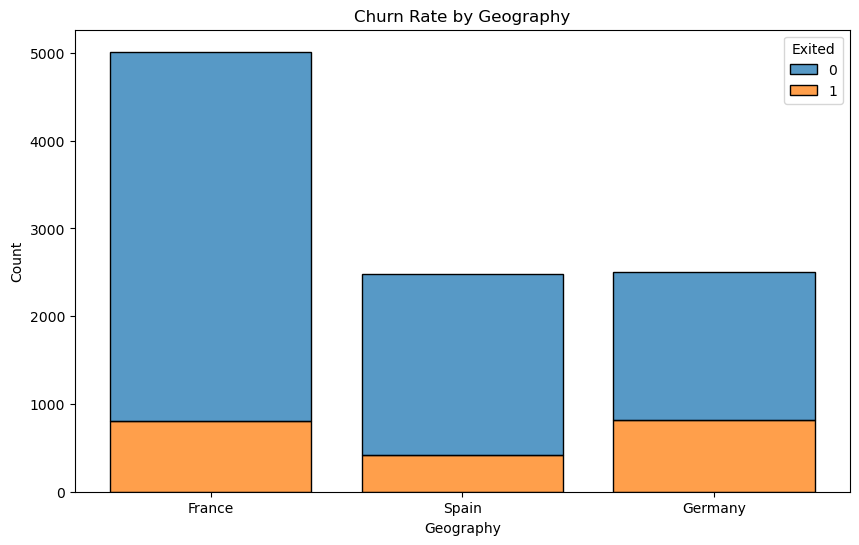

In [8]:
#Analyzing  proportion of customers who exited in each region with the help of histogram
# This visualization helps in understanding which countries have higher churn rates and if there's a notable difference in customer behavior by region.

churn_data = pd.read_csv("Churn_Modelling.csv")
plt.figure(figsize=(10, 6))
sn.histplot(data=churn_data, x='Geography', hue='Exited', multiple='stack', shrink=0.8)
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()



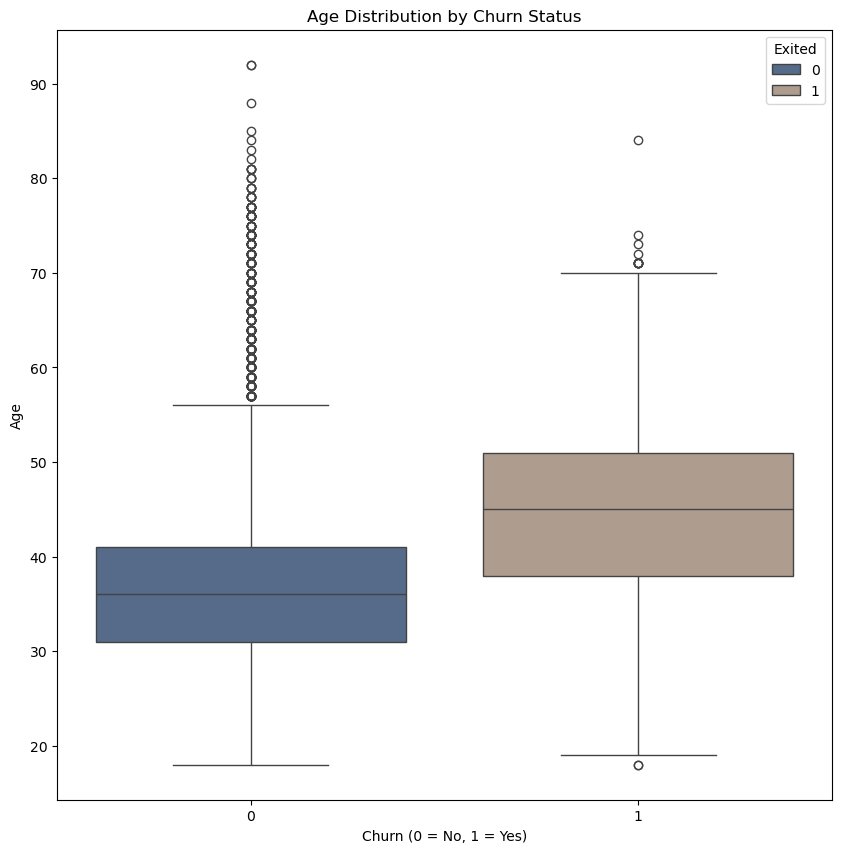

In [46]:
# Box plots to reveal age distributions across Exited (churn status).
# Box plots highlight age ranges, median values, and potential outliers. This analysis can reveal if certain age groups are more prone to churn.

plt.figure(figsize=(10, 10))
sn.boxplot(data=churn_data, x='Exited', y='Age', hue='Exited', palette={0: '#4C6A92', 1: '#B39C8A'})
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


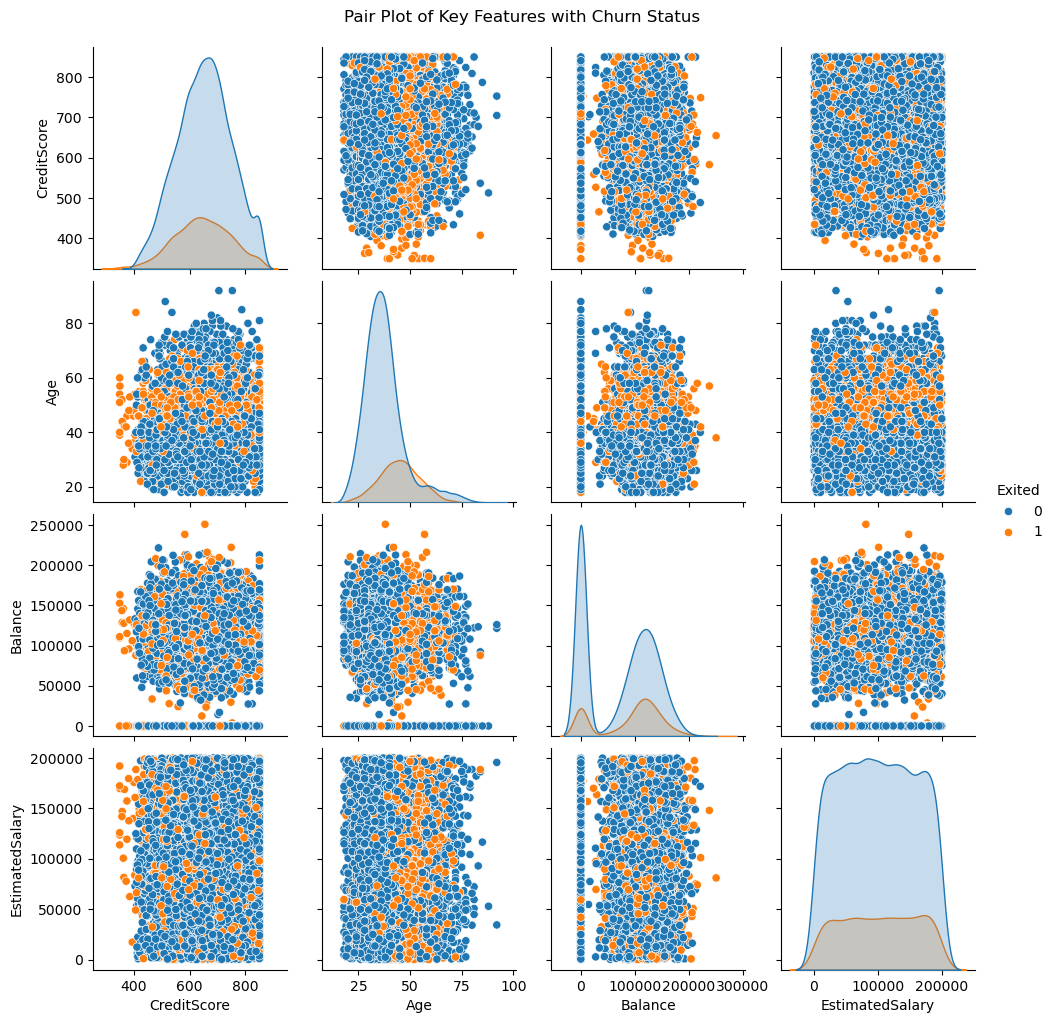

In [48]:
# Pair plots to visualize the relationships between features like CreditScore, Age, Balance, and how they affect Exited.
# Pair plots can help detect non-linear relationships between features and identify clusters of customers with specific characteristics.

sn.pairplot(churn_data, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], hue='Exited', diag_kind='kde')
plt.suptitle('Pair Plot of Key Features with Churn Status', y=1.02)
plt.show()


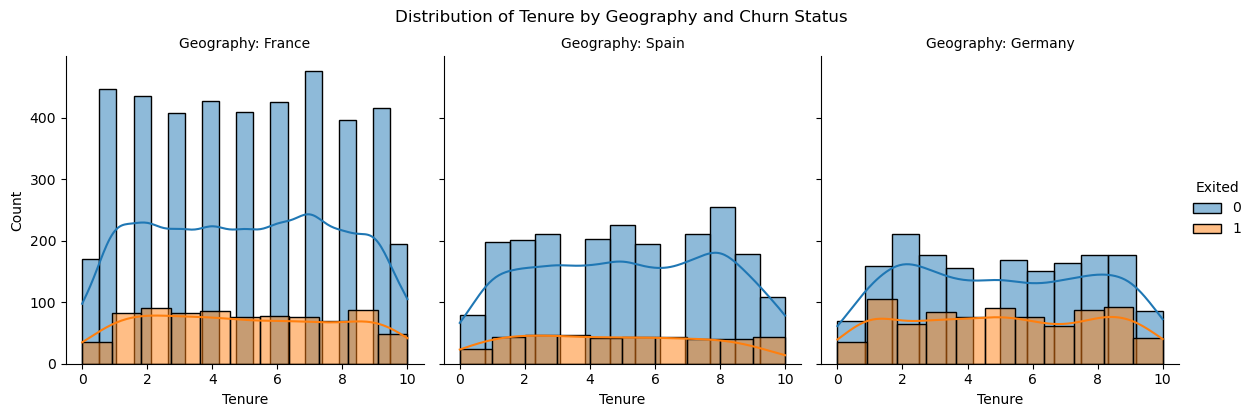

In [52]:
# Facet grid for 'Tenure' by 'Geography' and 'Exited'
# This analysis helps understand how customer tenure influences churn within different geographical locations.

g = sn.FacetGrid(churn_data, col='Geography', hue='Exited', height=4, aspect=1)
g.map(sn.histplot, 'Tenure', kde=True)
g.add_legend()
g.set_titles('Geography: {col_name}')
plt.suptitle('Distribution of Tenure by Geography and Churn Status', y=1.03)
plt.show()


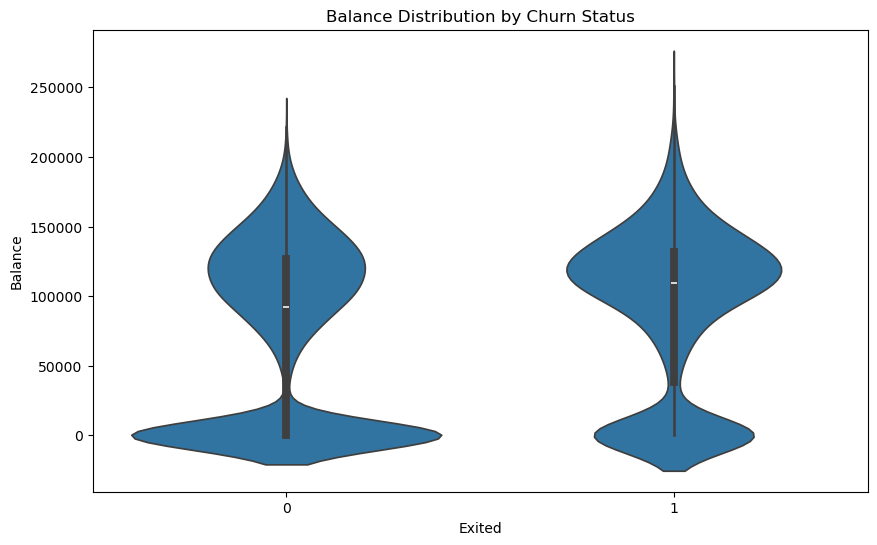

In [56]:
# We are using violin plots to show the distribution and density of feature'Balance' by Exited.
#Violin plots combine box plots and density plots, providing a comprehensive view of data distribution and concentration.

plt.figure(figsize=(10, 6))
sn.violinplot(data=churn_data, x='Exited', y='Balance')
plt.title('Balance Distribution by Churn Status')
plt.show()


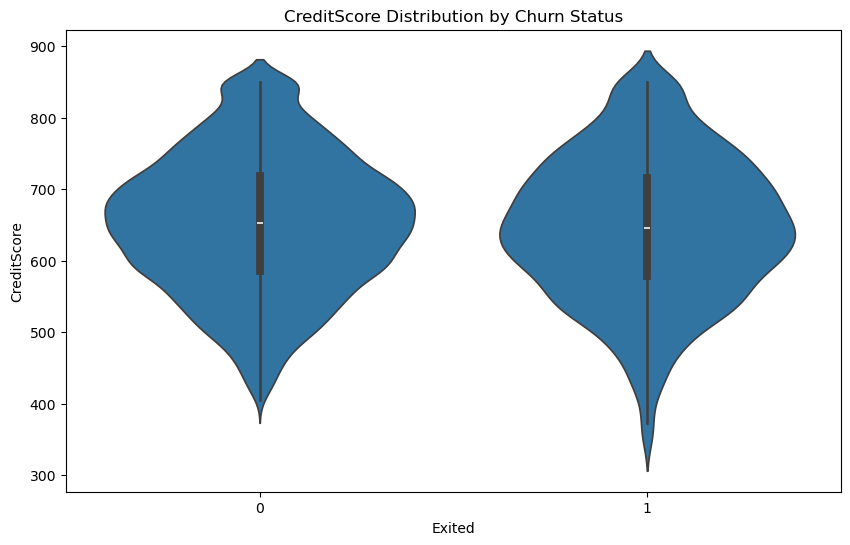

In [58]:
plt.figure(figsize=(10, 6))
sn.violinplot(data=churn_data, x='Exited', y='CreditScore')
plt.title('CreditScore Distribution by Churn Status')
plt.show()

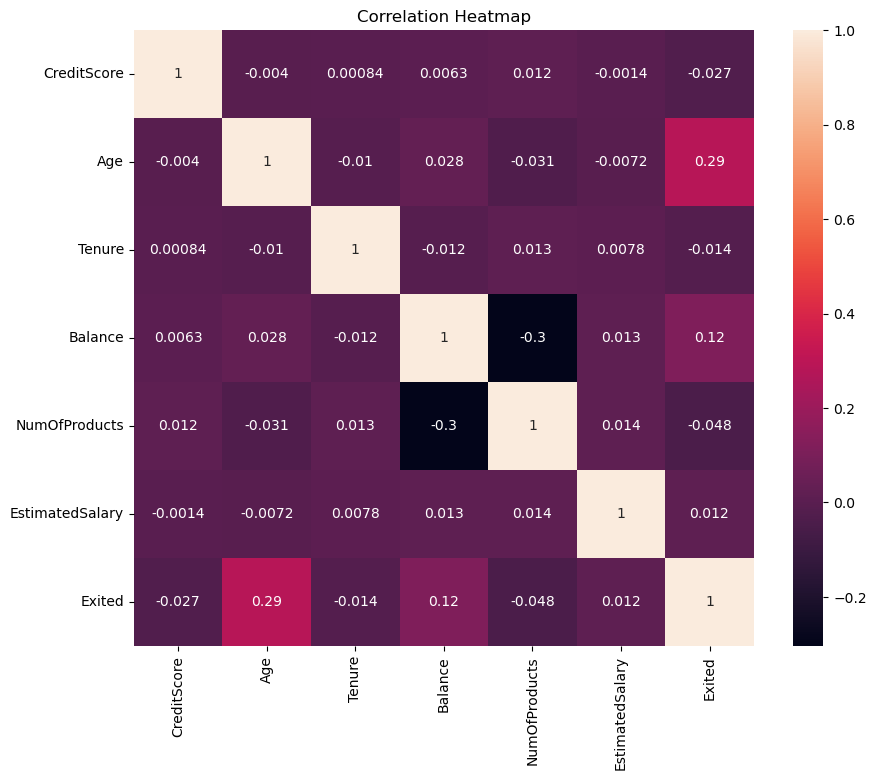

Correlational matrix:
                  CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 EstimatedSalary    Exited  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000  


In [62]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
correlational_matrix = churn_data[numerical_cols + ['Exited']].corr()
plt.figure(figsize=(10, 8))
sn.heatmap(correlational_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()
print("Correlational matrix:\n", correlational_matrix)

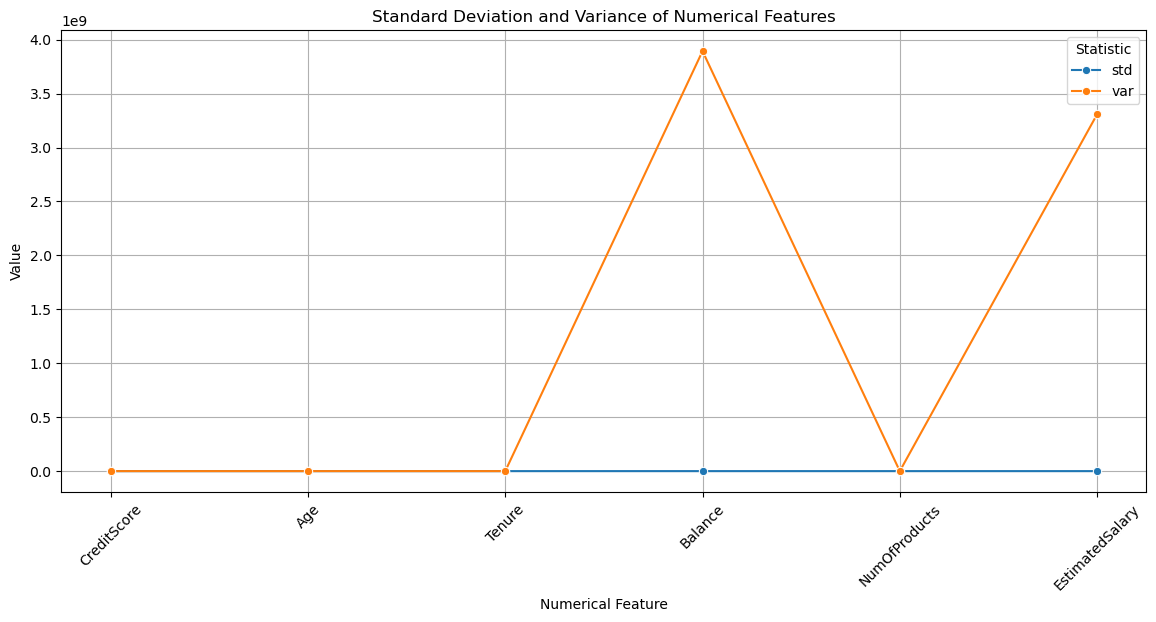

     CreditScore         Age    Tenure       Balance  NumOfProducts  \
std    96.653299   10.487806  2.892174  6.239741e+04       0.581654   
var  9341.860157  109.994084  8.364673  3.893436e+09       0.338322   

     EstimatedSalary  
std     5.751049e+04  
var     3.307457e+09  


In [80]:
descriptive_stats = churn_data[numerical_cols].agg(['std', 'var'])
# Reshape the data for plotting
descriptive_stats_transposed = descriptive_stats.T.reset_index().melt(id_vars='index', var_name='Statistic', value_name='Value')

# Plot the line graph
plt.figure(figsize=(14, 6))
sn.lineplot(data=descriptive_stats_transposed, x='index', y='Value', hue='Statistic', marker='o')
plt.title('Standard Deviation and Variance of Numerical Features')
plt.xlabel('Numerical Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print(descriptive_stats)

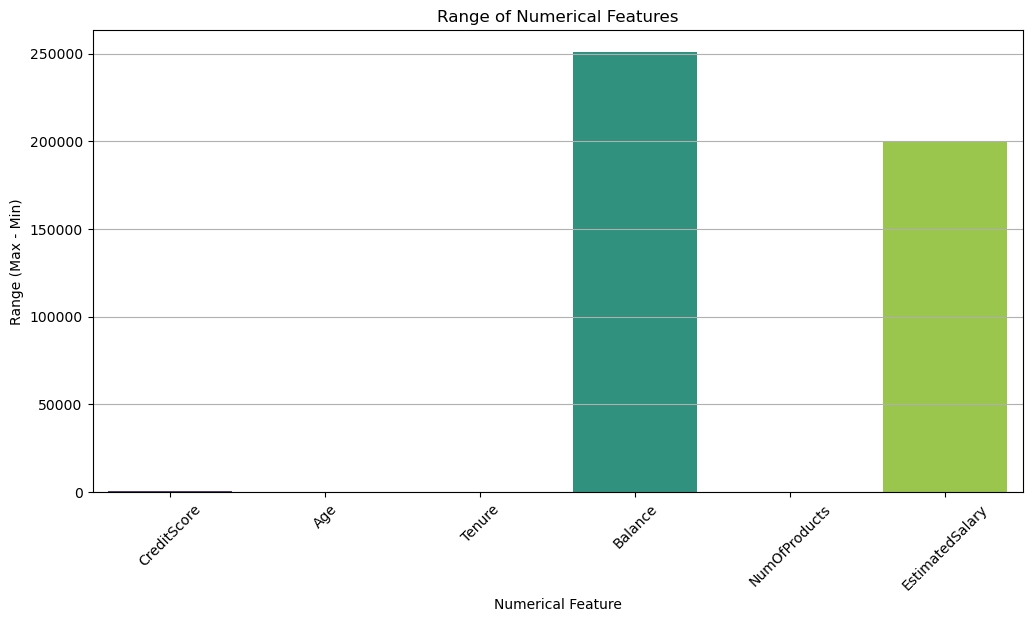

Range:
 CreditScore           500.00
Age                    74.00
Tenure                 10.00
Balance            250898.09
NumOfProducts           3.00
EstimatedSalary    199980.90
dtype: float64


In [96]:
range_stats = churn_data[numerical_cols].apply(lambda x: x.max() - x.min())

plt.figure(figsize=(12, 6))
sn.barplot(x=range_stats.index, y=range_stats.values, hue = range_stats.index, palette='viridis')
plt.title('Range of Numerical Features')
plt.xlabel('Numerical Feature')
plt.ylabel('Range (Max - Min)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print("Range:\n", range_stats)

In [ ]:
# Columns to plot
columns_to_plot = ['Age', 'CreditScore',  'EstimatedSalary']

# Set up the figure and axes for subplots (1 row and 3 columns, for example)
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 5), sharey=True)

# Iterate over each column and create a histogram
for i, column in enumerate(columns_to_plot):
    sn.histplot(data=churn_data, x=column, color="purple", kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show() 